In [ ]:

# Fixing the data structure by ensuring proper formatting for the boxplot
# Flattening the data into a list of categories, models, and z-scores

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        category_list.extend([category] * 100)
        model_list.extend([model] * 100)
        zscore_list.extend(data[category][model])

# Construct a DataFrame with the corrected format
df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# Set up the plot again
plt.figure(figsize=(10, 6))

# Create the boxplot
import seaborn as sns
sns.set(style="whitegrid")

# Create the boxplot with corrected data structure
ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette="Set2", showfliers=True
)

# Customizing the plot (axis labels, title, and legend)
ax.set_xlabel("Dataset Type")
ax.set_ylabel("Z-Score")
ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Model", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [15]:
# Reconstructing the dataset so it works correctly with the boxplot
# We will use the melted format where each category-model combination corresponds to its z-score.

# Creating a proper format by melting the original dictionary into a long-form DataFrame
category_model = []
z_scores = []
categories = ['Watermarked', 'Un-watermarked', 'Human']
models = ["OpenGen-GPT2", "OpenGen-OPT", "OpenGen-LLMa", "LFQA-GPT2", "LFQA-OPT", "LFQA-LLMa"]

for category in categories:
    for model in models:
        category_model.extend([f"{category}-{model}"] * 100)
        z_scores.extend(data[category][model])

# Create the DataFrame again using the correct structure
df_long = pd.DataFrame({
    'Category-Model': category_model,
    'Z-Score': z_scores
})

# Create the plot now
plt.figure(figsize=(10, 6))

# Create the boxplot with the corrected data
ax = sns.boxplot(
    x="Category-Model", y="Z-Score", data=df_long,
    palette="Set2", showfliers=True
)

# Customizing the plot (axis labels, title, and legend)
ax.set_xlabel("Dataset Type - Model")
ax.set_ylabel("Z-Score")
ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


KeyError: 'OpenGen-GPT2'

/tmp/ipykernel_3034335/4038286092.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)


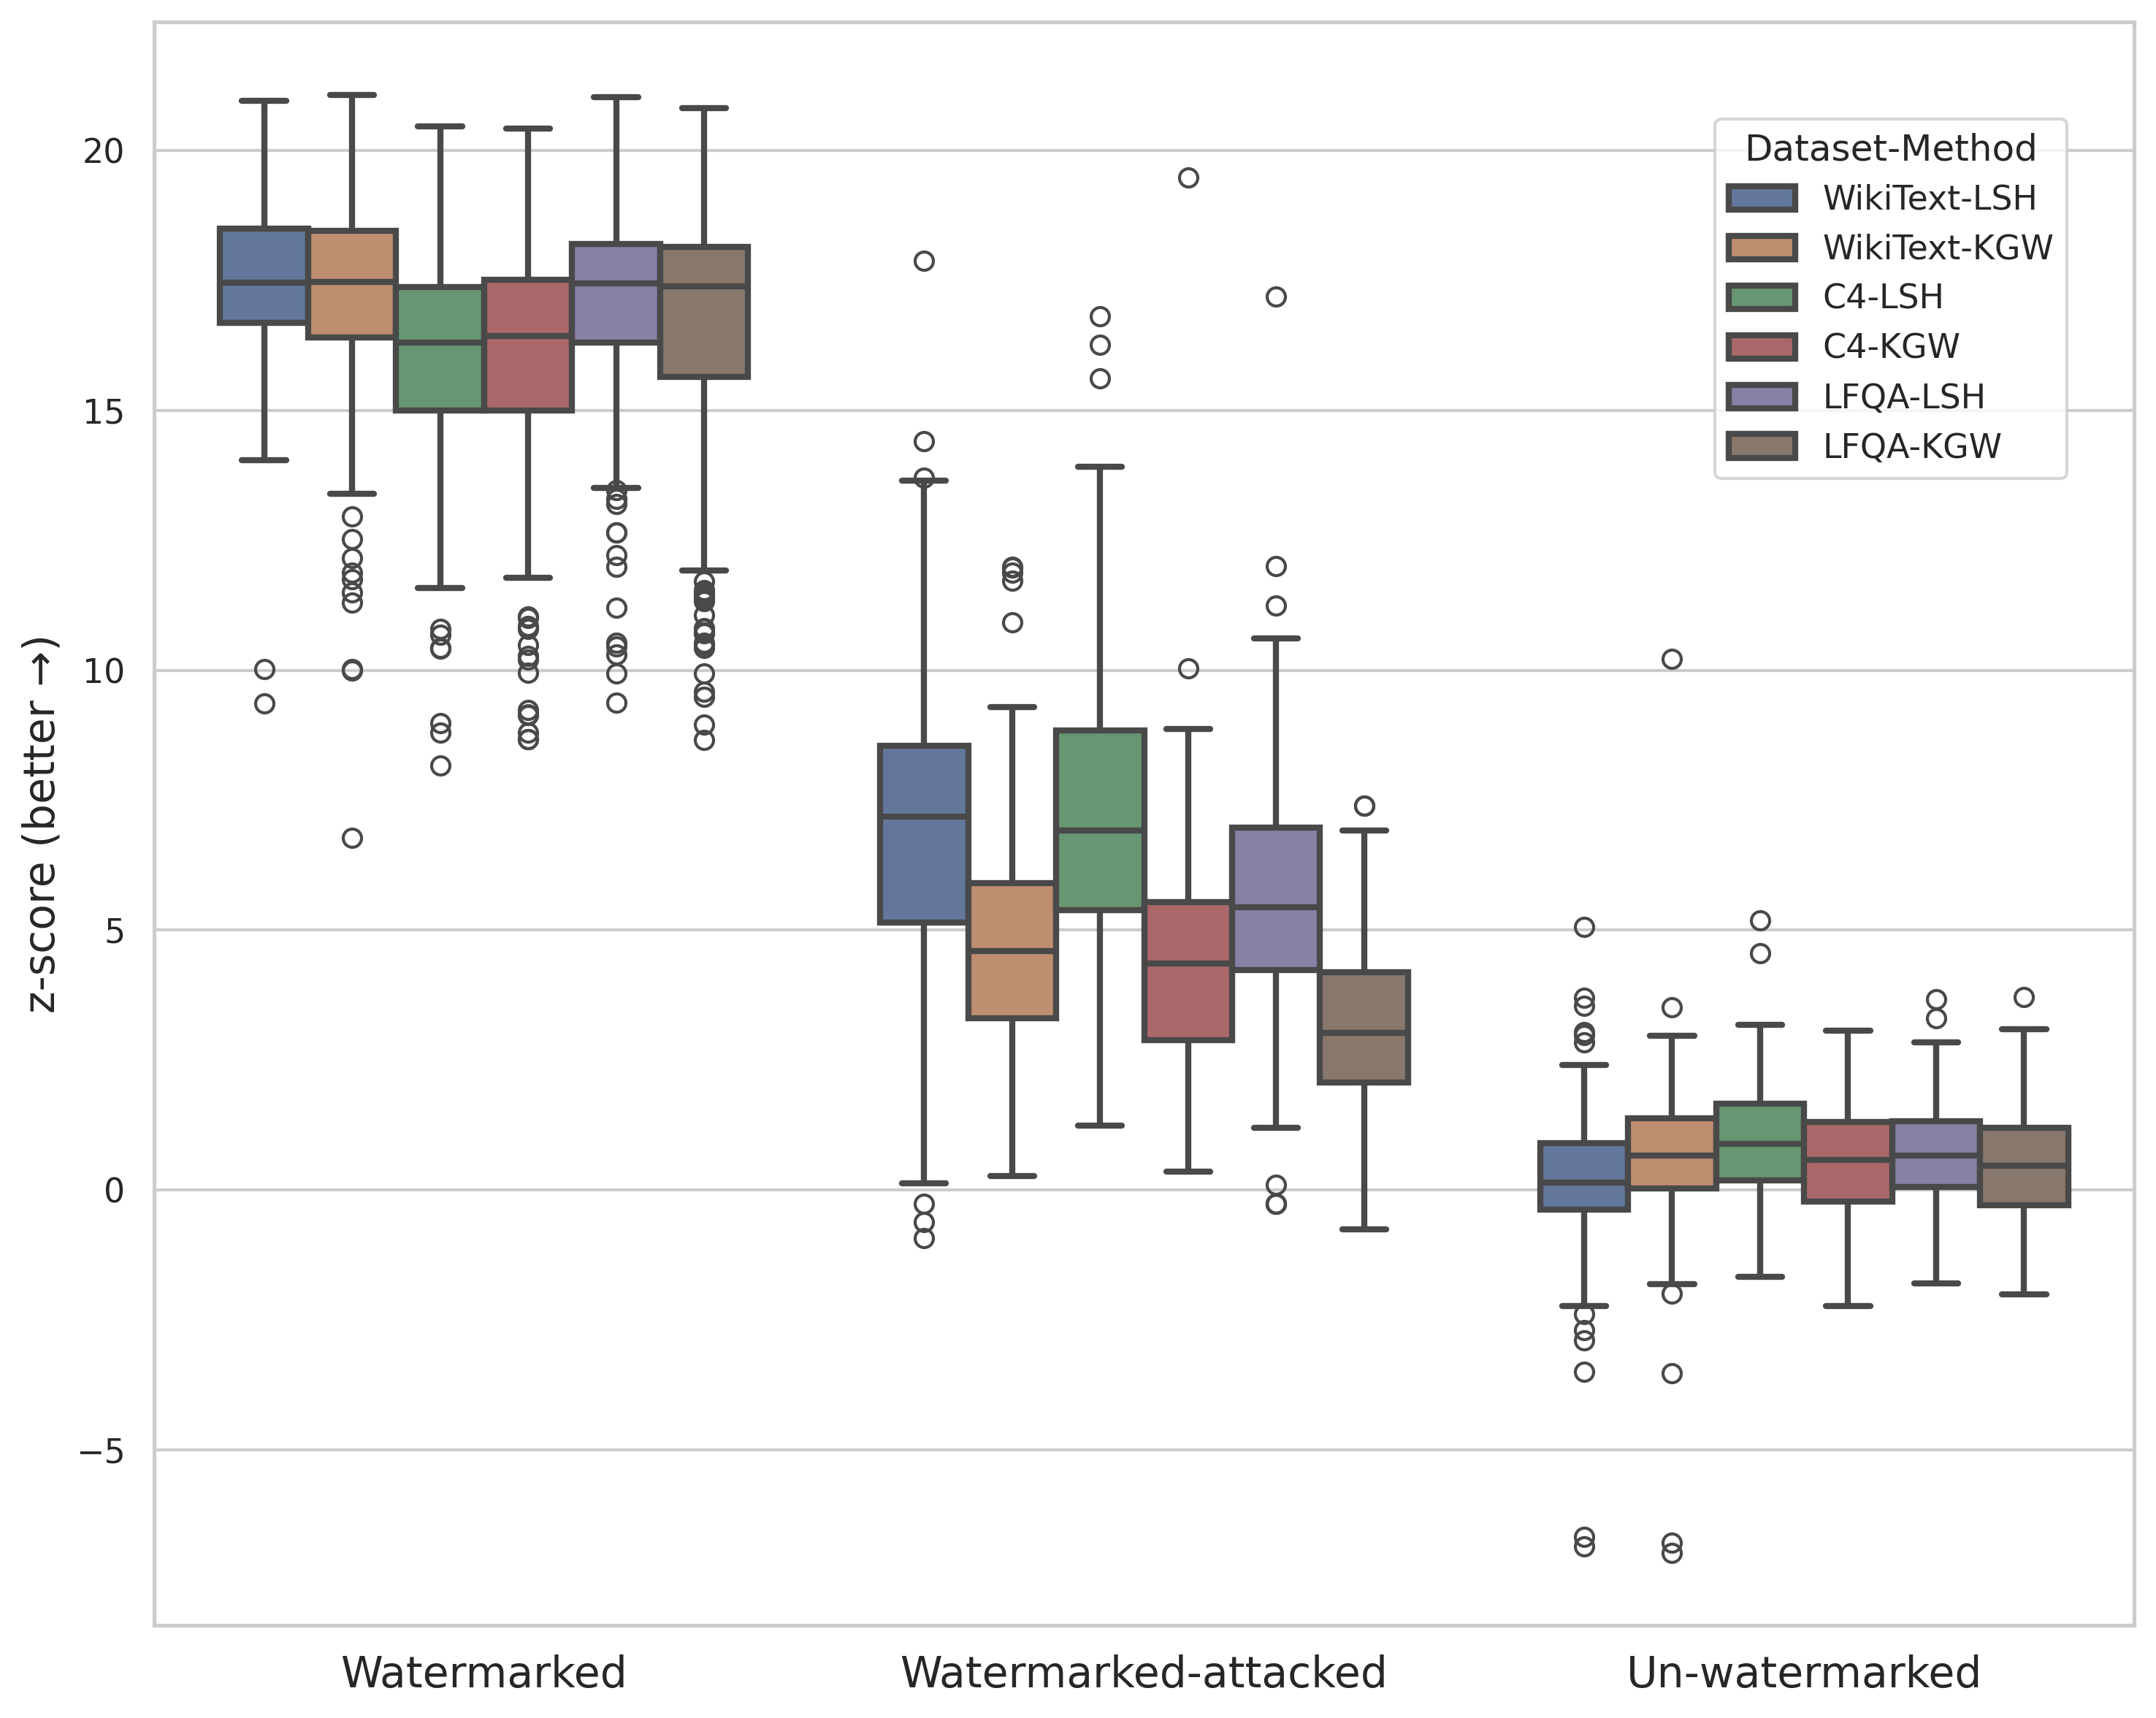

In [83]:
################################################
# Dataset-Methord Visualization Z—score
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['Watermarked', 'Watermarked-attacked', 'Un-watermarked']
models = ["WikiText-LSH","WikiText-KGW" ,"C4-LSH","C4-KGW", "LFQA-LSH", "LFQA-KGW"]


# WikiText_LSH="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# C4_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"

# WikiText_KGW="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score" 
# C4_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"

import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "C4_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "LFQA_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/lfqa/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.25_LSH_v2.2_lfqa_new/gen_table_GPT.jsonl_z_score",
    "WikiText_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score",
    "C4_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score",
    "LFQA_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/lfqa/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_ff-anchored_minhash_prf-4-True-15485863/gen_table_GPT.jsonl_z_score"
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_z_score": [], "w_wm_output_attacked_z_score": [], "no_wm_output_z_score": []}
    
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_z_score' in entry:
                    data["w_wm_output_z_score"].append(entry["w_wm_output_z_score"])
                if 'w_wm_output_attacked_z_score' in entry:
                    data["w_wm_output_attacked_z_score"].append(entry["w_wm_output_attacked_z_score"])
                if 'no_wm_output_z_score' in entry:
                    data["no_wm_output_z_score"].append(entry["no_wm_output_z_score"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "Watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_z_score']),
    },
    "Watermarked-attacked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_attacked_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_attacked_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_attacked_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_attacked_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_attacked_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_attacked_z_score']),
    },
    "Un-watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_z_score']),
    }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8),dpi=300)

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('z-score (better →)', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()

/tmp/ipykernel_3034335/1832219731.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)


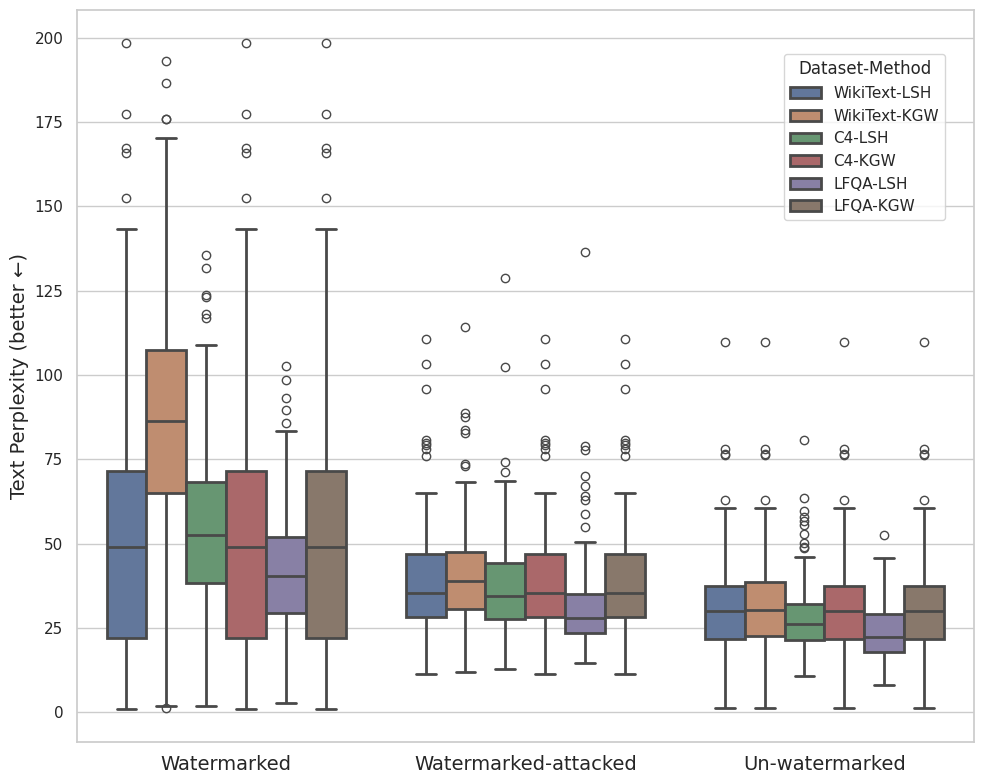

In [84]:
################################################
# Dataset-Methord Visualization ppl
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['Watermarked', 'Watermarked-attacked', 'Un-watermarked']
models = ["WikiText-LSH","WikiText-KGW" ,"C4-LSH","C4-KGW", "LFQA-LSH", "LFQA-KGW"]


# WikiText_LSH="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl"
# C4_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl"
# LFQA_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl"

# WikiText_KGW="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_ppl" 
# C4_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_ppl"
# LFQA_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_ppl"

import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl",
    "C4_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl",
    "LFQA_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/lfqa/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.25_LSH_v2.2_lfqa_new/gen_table_GPT.jsonl_z_score_ppl",
    "WikiText_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_ppl",
    "C4_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_ppl",
    "LFQA_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_ppl"
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_ppl": [], "w_wm_output_attacked_ppl": [], "no_wm_output_ppl": []}
    
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                if entry["no_wm_output_length"] >120:
                    if 'w_wm_output_ppl' in entry:
                        data["w_wm_output_ppl"].append(entry["w_wm_output_ppl"])
                    if 'w_wm_output_attacked_ppl' in entry:
                        data["w_wm_output_attacked_ppl"].append(entry["w_wm_output_attacked_ppl"])
                    if 'no_wm_output_ppl' in entry:
                        data["no_wm_output_ppl"].append(entry["no_wm_output_ppl"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "Watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_ppl']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_ppl']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_ppl']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_ppl']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_ppl']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_ppl']),
    },
    "Watermarked-attacked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_attacked_ppl']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_attacked_ppl']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_attacked_ppl']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_attacked_ppl']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_attacked_ppl']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_attacked_ppl']),
    },
    "Un-watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_ppl']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_ppl']),
        "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_ppl']),
        "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_ppl']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_ppl']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_ppl']),
    }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        zscores = [z for z in zscores if z <= 200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8))

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('Text Perplexity (better ←)', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()

/tmp/ipykernel_3034335/3703774935.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)


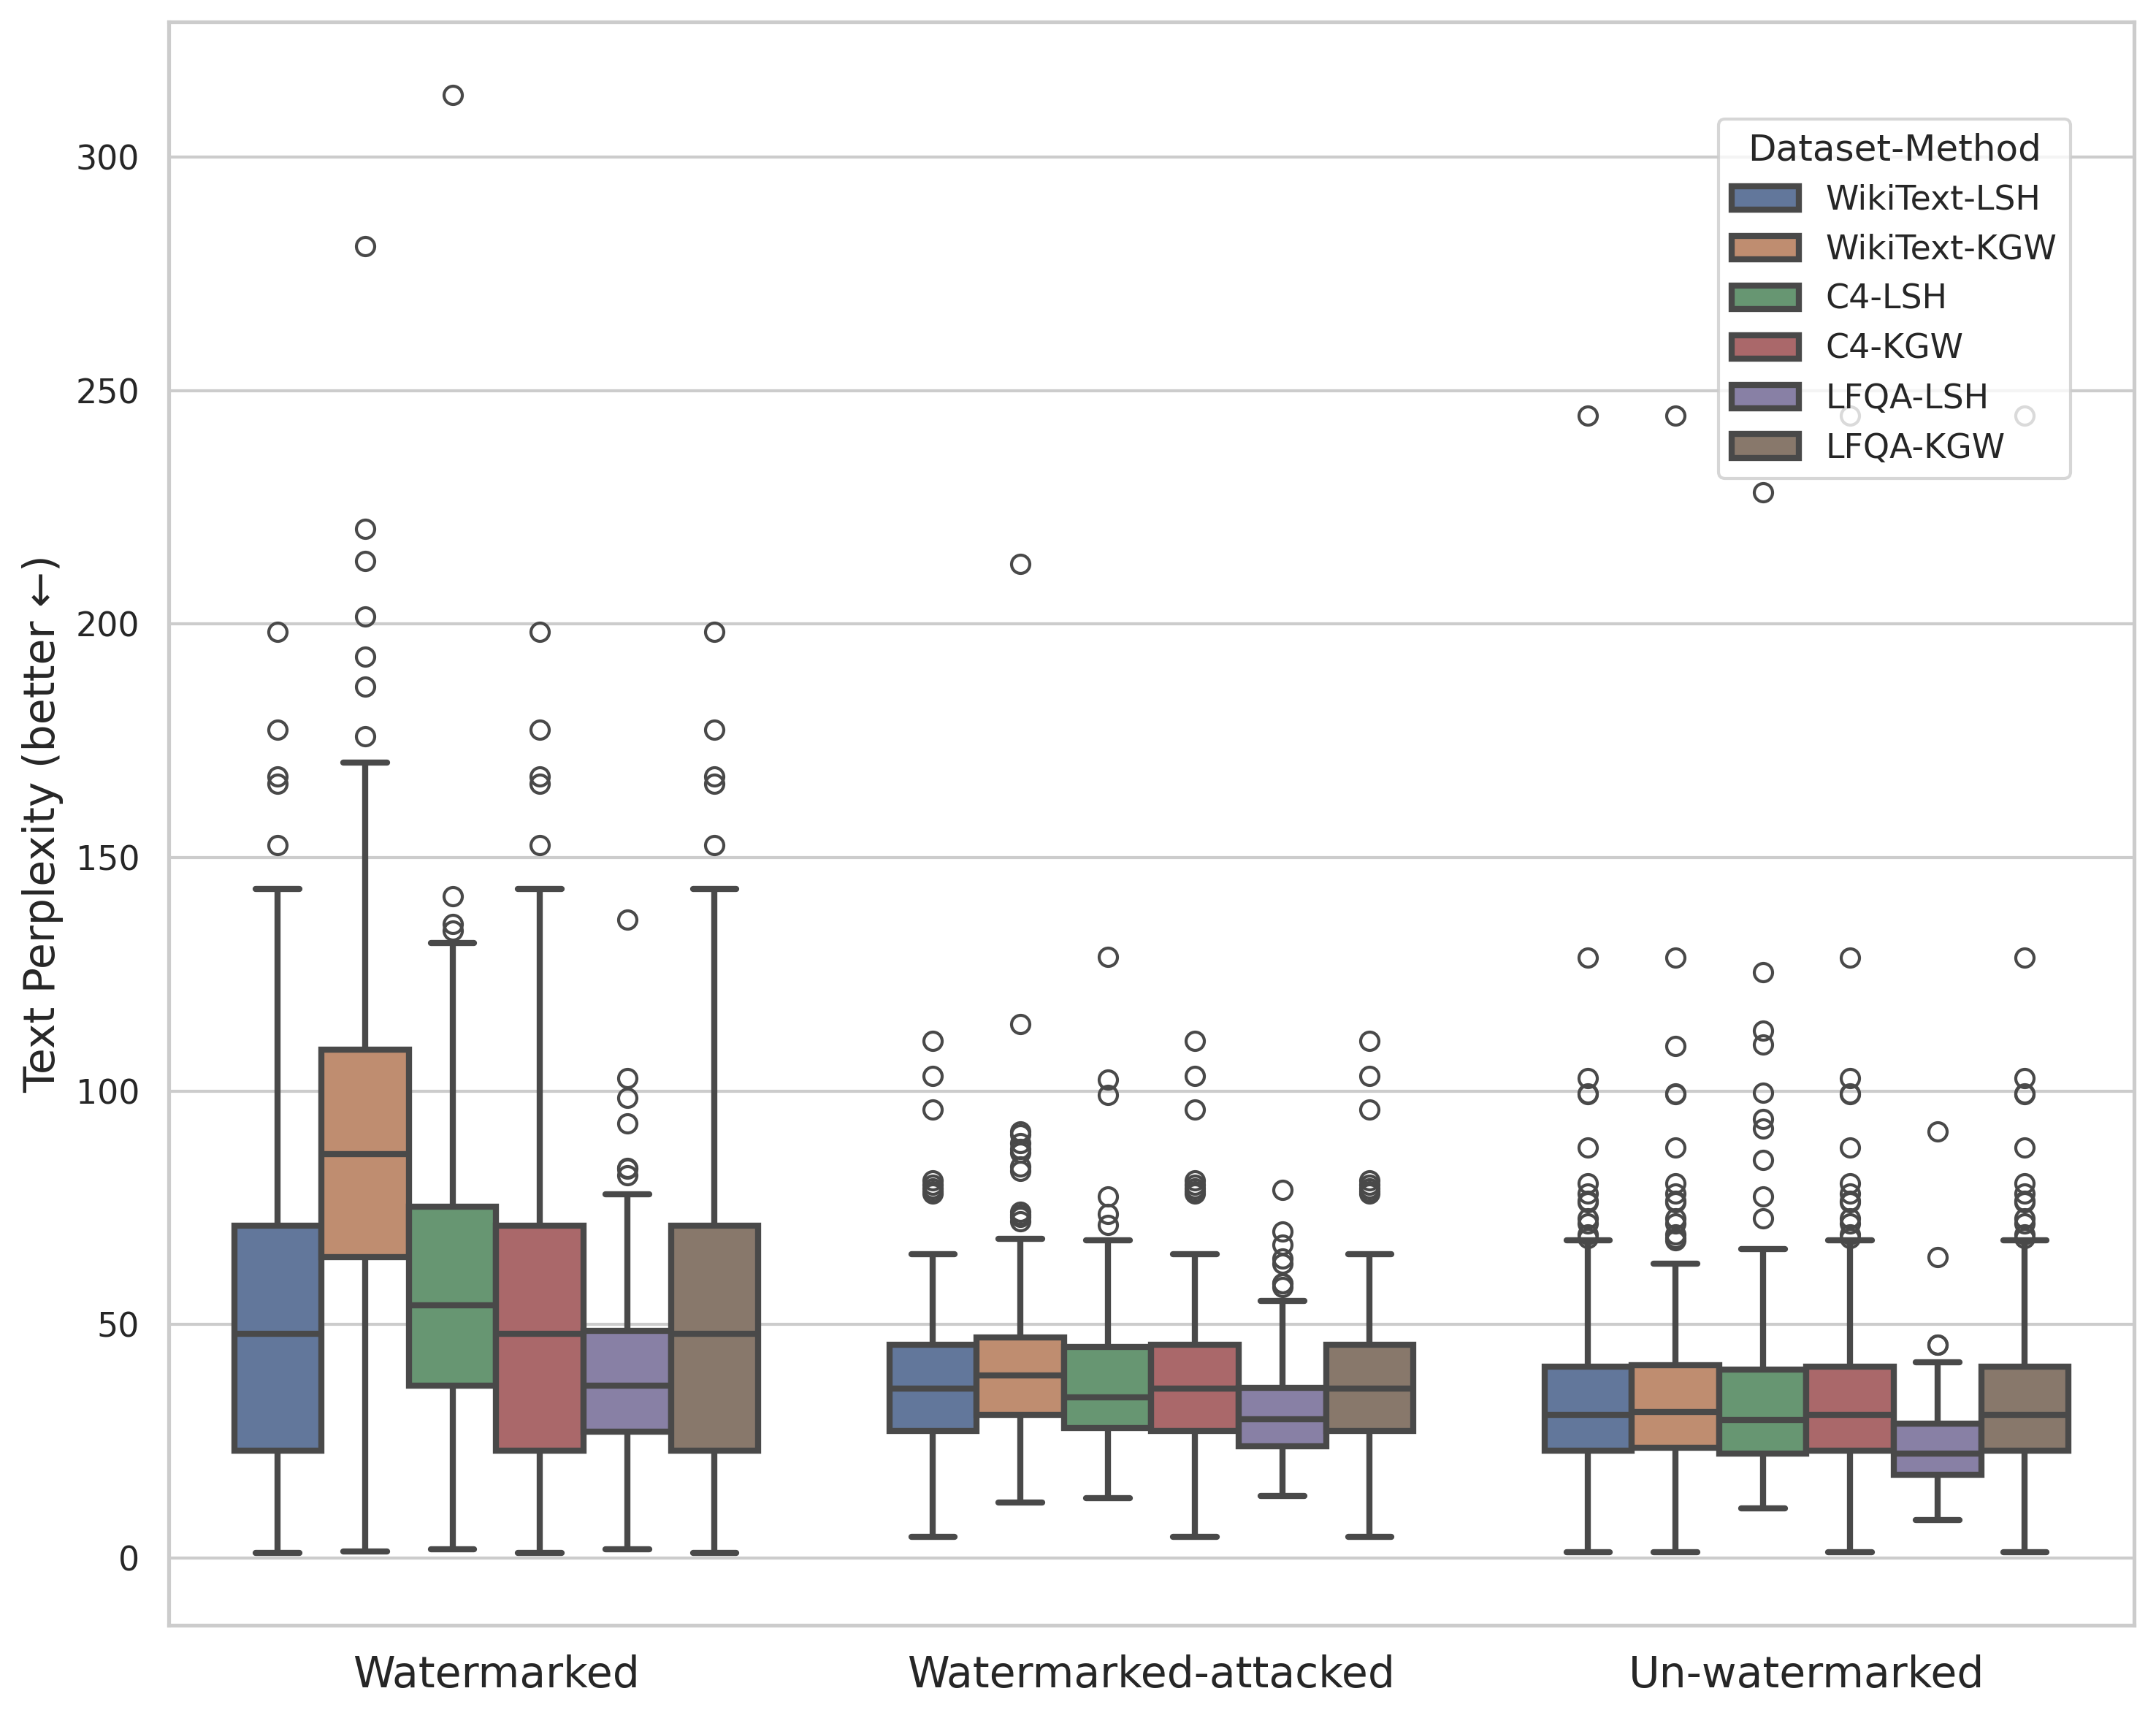

In [85]:
################################################
# Dataset-Methord Visualization ppl
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['Watermarked', 'Watermarked-attacked', 'Un-watermarked']
models = ["WikiText-LSH","WikiText-KGW" ,"C4-LSH","C4-KGW", "LFQA-LSH", "LFQA-KGW"]


# WikiText_LSH="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl"
# C4_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl"
# LFQA_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl"

# WikiText_KGW="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_ppl" 
# C4_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_ppl"
# LFQA_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_ppl"

import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl",
    "C4_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_ppl",
    "LFQA_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/lfqa/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.25_LSH_v2.2_lfqa_new/gen_table_GPT.jsonl_z_score_ppl",
    "WikiText_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_ppl",
    "C4_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_ppl",
    "LFQA_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_ppl"
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_ppl": [], "w_wm_output_attacked_ppl": [], "no_wm_output_ppl": []}
    
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_ppl' in entry:
                    data["w_wm_output_ppl"].append(entry["w_wm_output_ppl"])
                if 'w_wm_output_attacked_ppl' in entry:
                    data["w_wm_output_attacked_ppl"].append(entry["w_wm_output_attacked_ppl"])
                if 'no_wm_output_ppl' in entry:
                    data["no_wm_output_ppl"].append(entry["no_wm_output_ppl"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "Watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_ppl']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_ppl']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_ppl']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_ppl']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_ppl']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_ppl']),
    },
    "Watermarked-attacked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_attacked_ppl']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_attacked_ppl']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_attacked_ppl']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_attacked_ppl']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_attacked_ppl']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_attacked_ppl']),
    },
    "Un-watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_ppl']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_ppl']),
        "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_ppl']),
        "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_ppl']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_ppl']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_ppl']),
    }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8),dpi=300)

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('Text Perplexity (better ←)', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()


/tmp/ipykernel_3034335/2134672596.py:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)


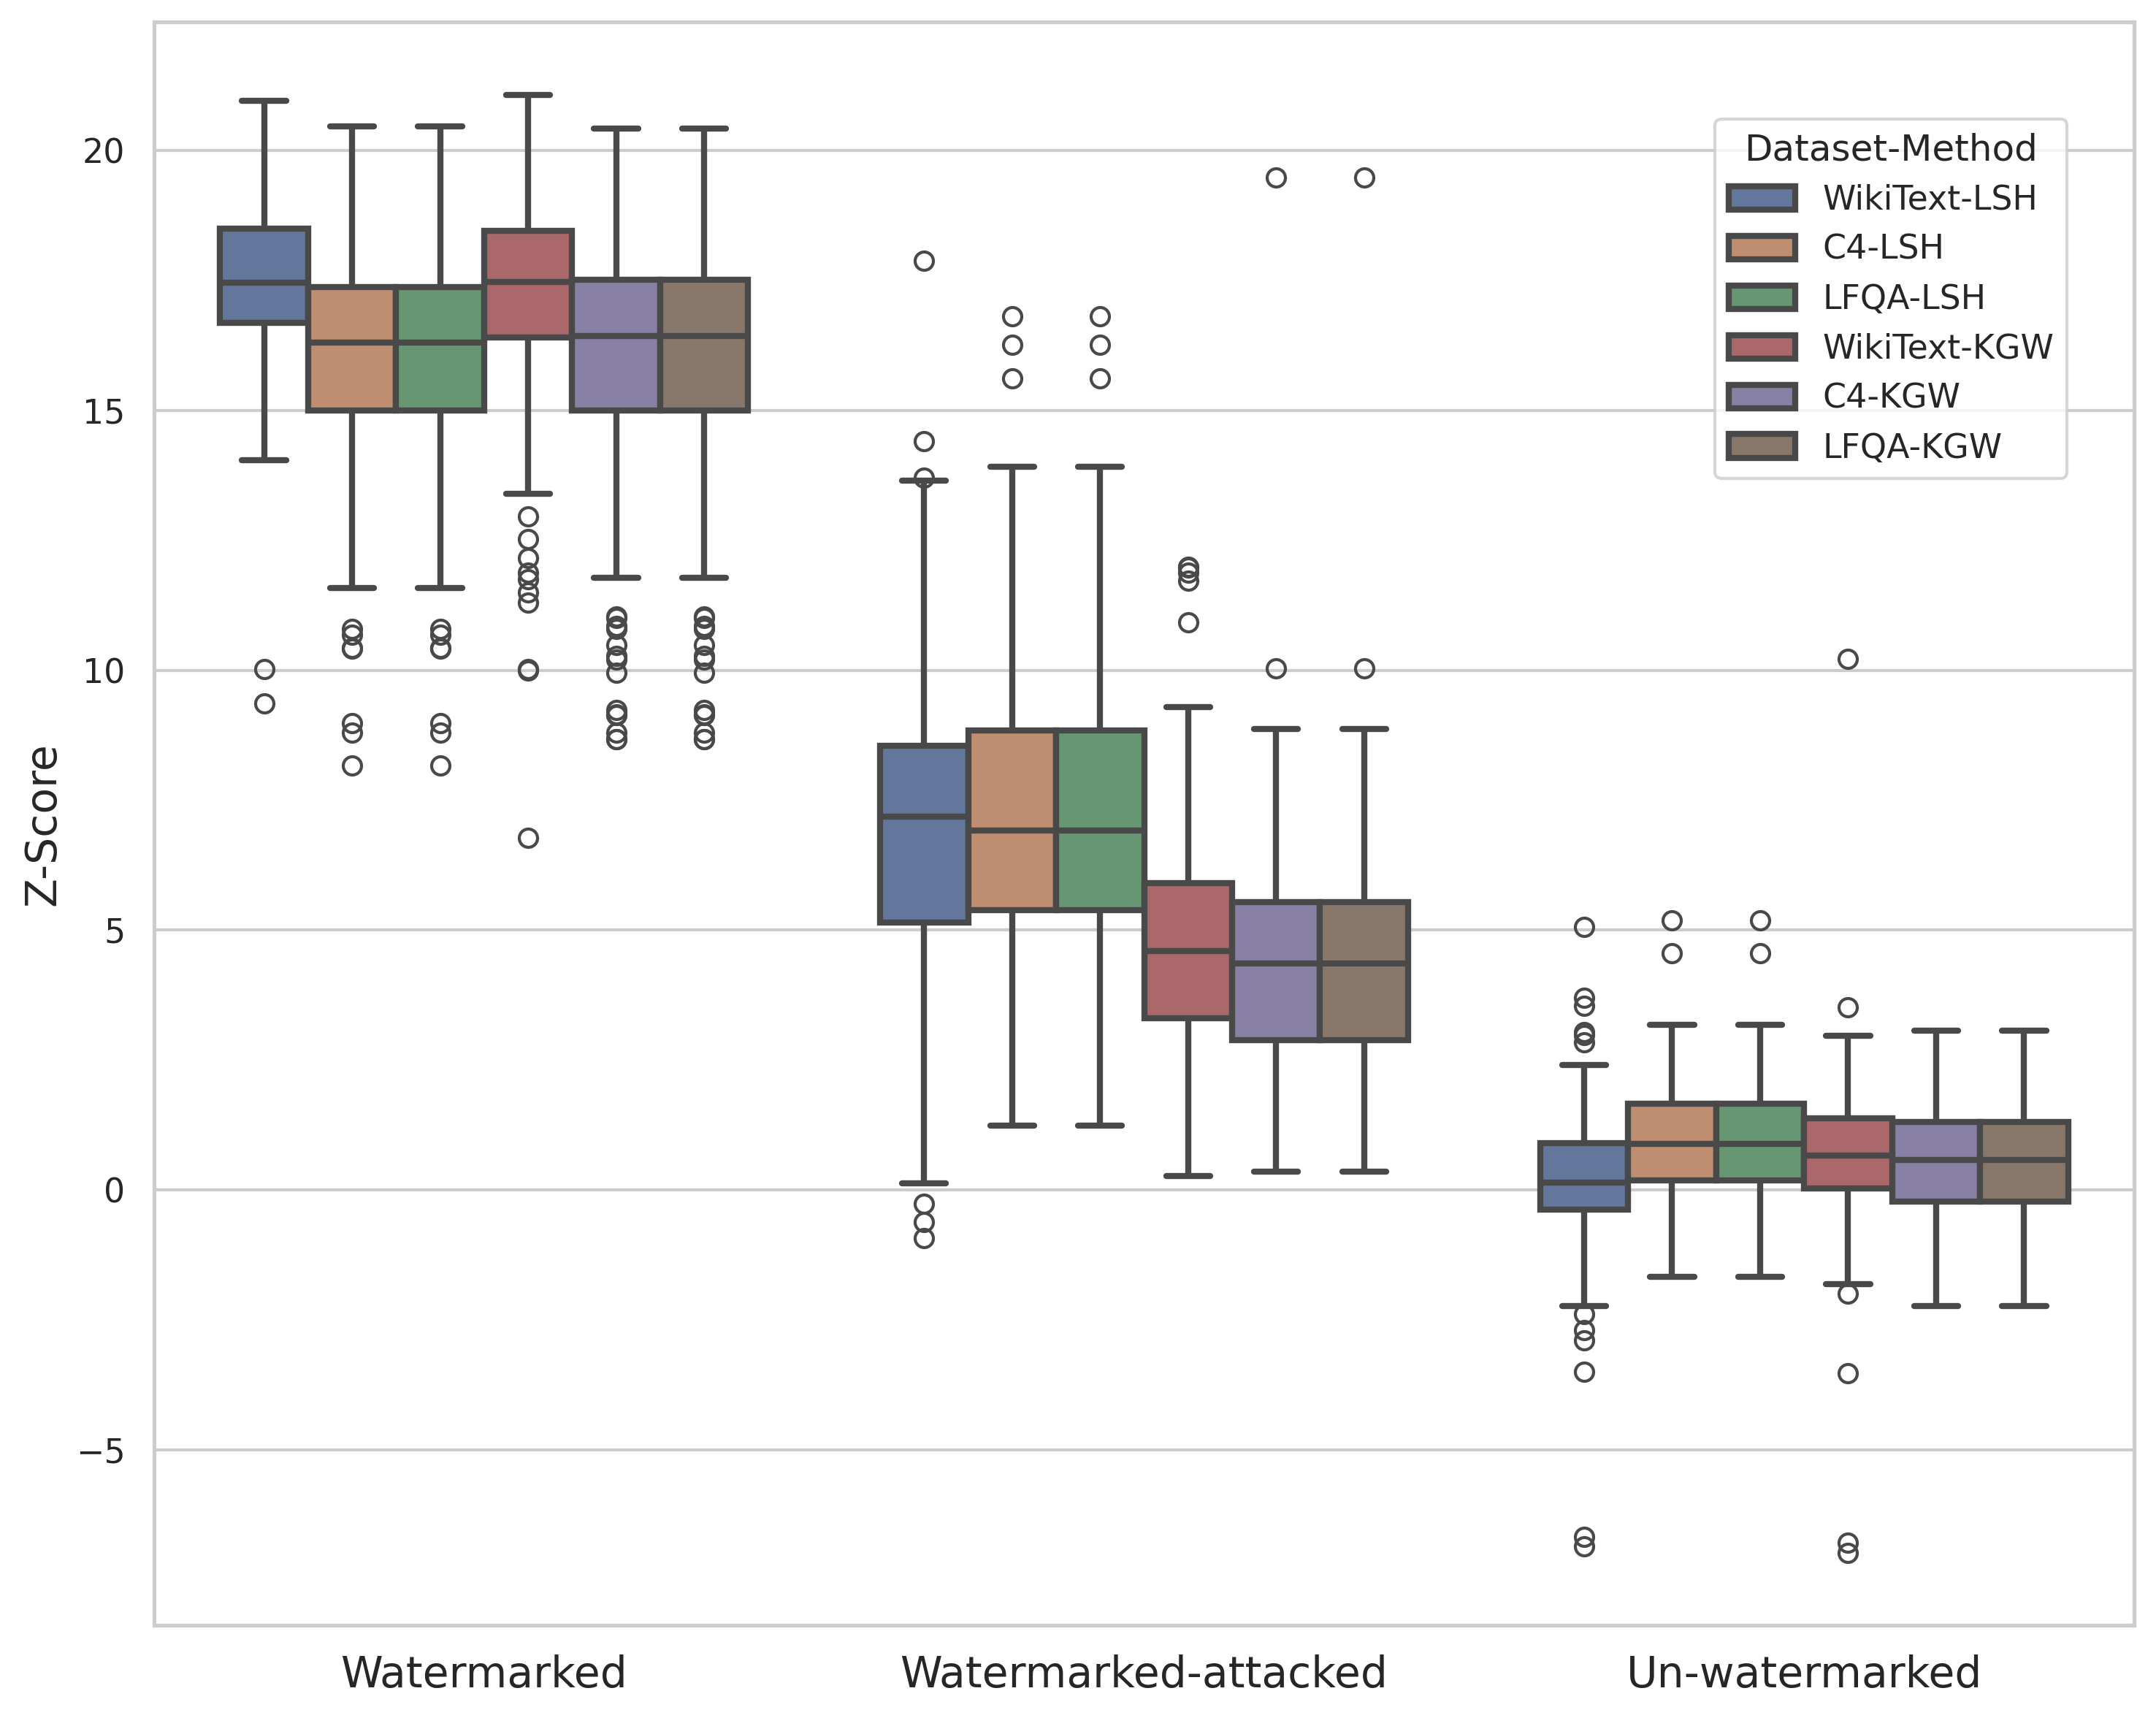

In [18]:
################################################
# PPL Dataset-Methord Visualization
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['Watermarked', 'Watermarked-attacked', 'Un-watermarked']
models = ["WikiText-LSH", "C4-LSH", "LFQA-LSH", "WikiText-KGW", "C4-KGW", "LFQA-KGW"]



import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "C4_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "LFQA_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "WikiText_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score",
    "C4_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score",
    "LFQA_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_z_score": [], "w_wm_output_attacked_z_score": [], "no_wm_output_z_score": []}
    
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_z_score' in entry:
                    data["w_wm_output_z_score"].append(entry["w_wm_output_z_score"])
                if 'w_wm_output_attacked_z_score' in entry:
                    data["w_wm_output_attacked_z_score"].append(entry["w_wm_output_attacked_z_score"])
                if 'no_wm_output_z_score' in entry:
                    data["no_wm_output_z_score"].append(entry["no_wm_output_z_score"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "Watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_z_score']),
    },
    "Watermarked-attacked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_attacked_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_attacked_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_attacked_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_attacked_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_attacked_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_attacked_z_score']),
    },
    "Un-watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_z_score']),
    }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8),dpi=300)

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('Z-Score', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()

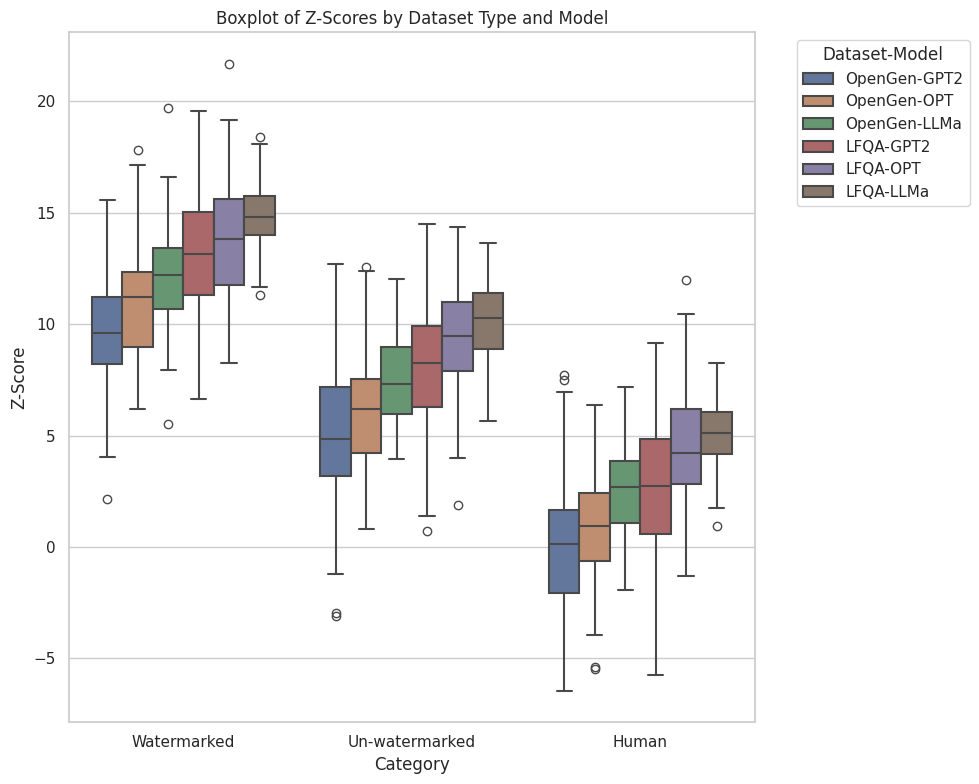

In [19]:
################################################
# 测试用的随机生成的模版
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

# Simulating z-scores for 5 models under 3 conditions (Watermarked, Un-watermarked, Human)
data = {
    "Watermarked": {
        "OpenGen-GPT2": np.random.normal(10, 3, 100),
        "OpenGen-OPT": np.random.normal(11, 2.5, 100),
        "OpenGen-LLMa": np.random.normal(12, 2, 100),
        "LFQA-GPT2": np.random.normal(13, 3, 100),
        "LFQA-OPT": np.random.normal(14, 2.5, 100),
        "LFQA-LLMa": np.random.normal(15, 1.5, 100),
    },
    "Un-watermarked": {
        "OpenGen-GPT2": np.random.normal(5, 3, 100),
        "OpenGen-OPT": np.random.normal(6, 2.5, 100),
        "OpenGen-LLMa": np.random.normal(7, 2, 100),
        "LFQA-GPT2": np.random.normal(8, 3, 100),
        "LFQA-OPT": np.random.normal(9, 2.5, 100),
        "LFQA-LLMa": np.random.normal(10, 1.5, 100),
    },
    "Human": {
        "OpenGen-GPT2": np.random.normal(0, 3, 100),
        "OpenGen-OPT": np.random.normal(1, 2.5, 100),
        "OpenGen-LLMa": np.random.normal(2, 2, 100),
        "LFQA-GPT2": np.random.normal(3, 3, 100),
        "LFQA-OPT": np.random.normal(4, 2.5, 100),
        "LFQA-LLMa": np.random.normal(5, 1.5, 100),
    }
}

# Convert to a DataFrame format that fits the boxplot
data_combined = []
categories = list(data.keys())
models = list(data["Watermarked"].keys())

# Fixing the data structure by ensuring proper formatting for the boxplot
# Flattening the data into a list of categories, models, and z-scores

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        category_list.extend([category] * 100)
        model_list.extend([model] * 100)
        zscore_list.extend(data[category][model])

# Construct a DataFrame with the corrected format
df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# Set up the plot again
plt.figure(figsize=(10, 8))

# Create the boxplot
import seaborn as sns
sns.set(style="whitegrid")

# Create the boxplot with corrected data structure
# ax = sns.boxplot(
#     x="Category", y="Z-Score", hue="Model", data=df_corrected,
#     palette="Set2", showfliers=True
# )
ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True,linewidth=1.5 
)

# Customizing the plot (axis labels, title, and legend)
# ax.set_xlabel("Dataset Type")
ax.set_ylabel("Z-Score")
ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Model", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


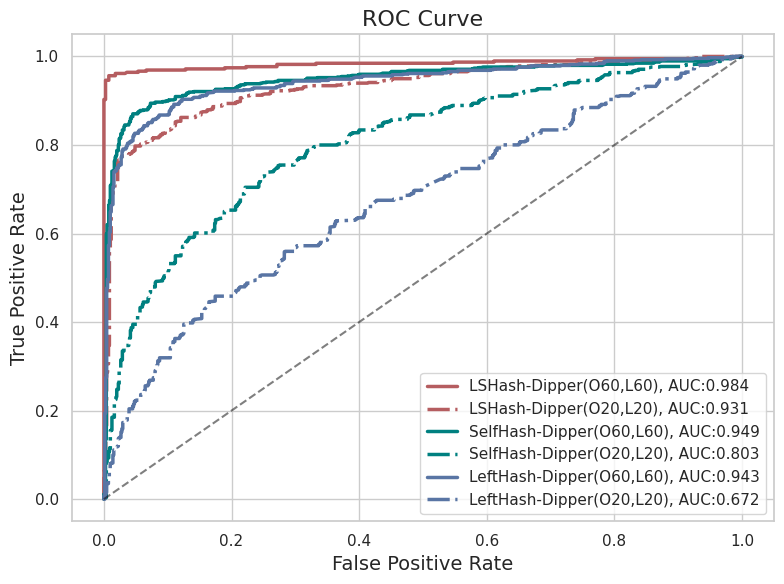

In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import math

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# 加载 z-scores
def load_z_scores(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))

    # Assuming 'w_wm_output_z_score' and 'no_wm_output_z_score' are the relevant keys
    human_z_scores = [entry.get('no_wm_output_z_score', math.nan) for entry in data]
    machine_z_scores_unattacked = [entry.get('w_wm_output_z_score', math.nan) for entry in data]
    machine_z_scores_01 = [entry.get('w_wm_output_attacked_z_score', math.nan) for entry in data]  # Example for epsilon=0.1
    return human_z_scores, machine_z_scores_unattacked, machine_z_scores_01

# 清理数据，去除 NaN 值
def clean_z_scores(human_z, machine_z):
    valid_human_z = [z for z in human_z if not np.isnan(z)]
    valid_machine_z = [z for z in machine_z if not np.isnan(z)]
    
    min_len = min(len(valid_human_z), len(valid_machine_z))
    return valid_human_z[:min_len], valid_machine_z[:min_len]

# 计算 ROC AUC
def calculate_roc_auc(human_z, machine_z):
    # assert len(human_z) == len(machine_z)

    all_scores = np.concatenate([np.array(human_z), np.array(machine_z)])
    
    baseline_labels = np.zeros_like(human_z)
    watermark_labels = np.ones_like(machine_z)
    all_labels = np.concatenate([baseline_labels, watermark_labels])

    fpr, tpr, _ = roc_curve(all_labels, all_scores, pos_label=1)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc


# 可视化ROC曲线
def plot_roc_curve():
    ########################################################################################################
    # lsh dipper 60
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O60_L60.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    # 绘制 ROC 曲线
    plt.figure(figsize=(8, 6))
    # 绘制不同的曲线
    # plt.plot(fpr_unattacked, tpr_unattacked, color='lightgreen', label=f'unattacked, AUC:{auc_unattacked:.3f}')
    plt.plot(fpr_01, tpr_01, color=colors[3], linewidth=2.5,label=f'LSHash-Dipper(O60,L60), AUC:{auc_01:.3f}')
    # plt.plot(fpr_unattacked, tpr_unattacked, color='teal', label=f'un, AUC:{auc_unattacked :.3f}')
    ########################################################################################################
    # lsh dipper 20
    data_path =  "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O20_L20.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    # 绘制不同的曲线
    # plt.plot(fpr_unattacked, tpr_unattacked, color='lightgreen', label=f'unattacked, AUC:{auc_unattacked:.3f}')
    plt.plot(fpr_01, tpr_01, color=colors[3], linewidth=2.5,linestyle='-.', label=f'LSHash-Dipper(O20,L20), AUC:{auc_01:.3f}')
    # plt.plot(fpr_unattacked, tpr_unattacked, color='teal', label=f'un, AUC:{auc_unattacked :.3f}')
    ########################################################################################################
    # kwg dipper 60
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O60_L60.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color='teal', linewidth=2.5,label=f'SelfHash-Dipper(O60,L60), AUC:{auc_01:.3f}')
    ########################################################################################################
    # kwg dipper 20
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O20_L20.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color='teal',linewidth=2.5,linestyle='-.', label=f'SelfHash-Dipper(O20,L20), AUC:{auc_01:.3f}')
    ########################################################################################################
    # kwg dipper 20
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_lefthash/gen_table_dipper_O60_L60.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[0],linewidth=2.5, label=f'LeftHash-Dipper(O60,L60), AUC:{auc_01:.3f}')
    
    ########################################################################################################
    # kwg dipper 20
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_lefthash/gen_table_dipper_O20_L20.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[0],linewidth=2.5, linestyle='-.',label=f'LeftHash-Dipper(O20,L20), AUC:{auc_01:.3f}')
    ########################################################################################################
    # 绘制基准线
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', alpha=0.5)
    # 设置坐标轴标签和标题
    plt.xlabel('False Positive Rate', fontsize=14)  # 设置x轴标签字体大小
    plt.ylabel('True Positive Rate', fontsize=14)   # 设置y轴标签字体大小
    plt.title('ROC Curve', fontsize=16)              # 设置图表标题字体大小

    # 添加图例
    plt.legend(loc='lower right', fontsize=11, markerscale=2)  # 放大图例中的标记


    # 显示图形
    plt.tight_layout()
    plt.show()

# 调用可视化函数
plot_roc_curve()


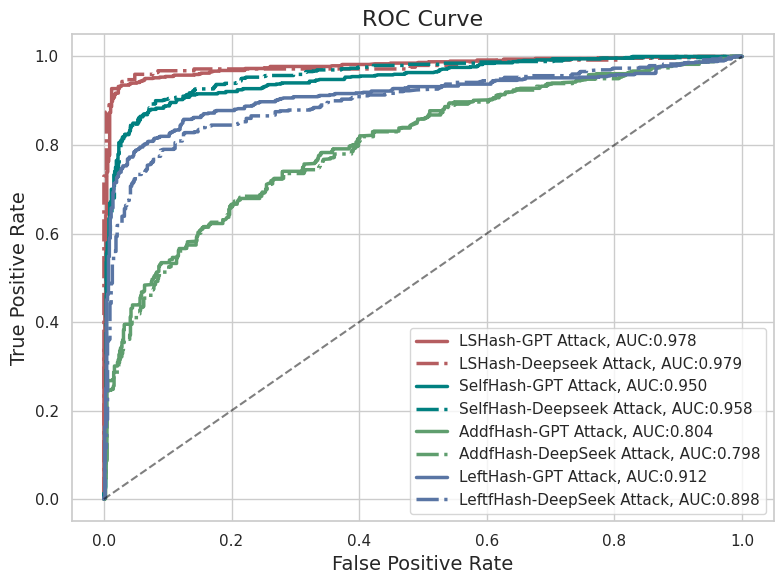

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import math

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

def load_z_scores(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))

    # Assuming 'w_wm_output_z_score' and 'no_wm_output_z_score' are the relevant keys
    human_z_scores = [entry.get('no_wm_output_z_score', math.nan) for entry in data]
    machine_z_scores_unattacked = [entry.get('w_wm_output_z_score', math.nan) for entry in data]
    machine_z_scores_01 = [entry.get('w_wm_output_attacked_z_score', math.nan) for entry in data]  # Example for epsilon=0.1
    return human_z_scores, machine_z_scores_unattacked, machine_z_scores_01

def clean_z_scores(human_z, machine_z):
    valid_human_z = [z for z in human_z if not np.isnan(z)]
    valid_machine_z = [z for z in machine_z if not np.isnan(z)]
    
    min_len = min(len(valid_human_z), len(valid_machine_z))
    return valid_human_z[:min_len], valid_machine_z[:min_len]

def calculate_roc_auc(human_z, machine_z):
    # assert len(human_z) == len(machine_z)

    all_scores = np.concatenate([np.array(human_z), np.array(machine_z)])
    
    baseline_labels = np.zeros_like(human_z)
    watermark_labels = np.ones_like(machine_z)
    all_labels = np.concatenate([baseline_labels, watermark_labels])

    fpr, tpr, _ = roc_curve(all_labels, all_scores, pos_label=1)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc


def plot_roc_curve():
    ########################################################################################################
    # lsh dipper 60
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    # 绘制 ROC 曲线
    plt.figure(figsize=(8, 6))
    # 绘制不同的曲线
    # plt.plot(fpr_unattacked, tpr_unattacked, color='lightgreen', label=f'unattacked, AUC:{auc_unattacked:.3f}')
    plt.plot(fpr_01, tpr_01, color=colors[3], linewidth=2.5,label=f'LSHash-GPT Attack, AUC:{auc_01:.3f}')
    # plt.plot(fpr_unattacked, tpr_unattacked, color='teal', label=f'un, AUC:{auc_unattacked :.3f}')
    ########################################################################################################
    # lsh dipper 20
    data_path =  "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_deepseek_attacker.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    # 绘制不同的曲线
    # plt.plot(fpr_unattacked, tpr_unattacked, color='lightgreen', label=f'unattacked, AUC:{auc_unattacked:.3f}')
    plt.plot(fpr_01, tpr_01, color=colors[3], linewidth=2.5,linestyle='-.', label=f'LSHash-Deepseek Attack, AUC:{auc_01:.3f}')
    # plt.plot(fpr_unattacked, tpr_unattacked, color='teal', label=f'un, AUC:{auc_unattacked :.3f}')
    ########################################################################################################
    # kwg dipper 60
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color='teal', linewidth=2.5,label=f'SelfHash-GPT Attack, AUC:{auc_01:.3f}')
    ########################################################################################################
    # kwg dipper 20
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_deepseek_attacker.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color='teal',linewidth=2.5,linestyle='-.', label=f'SelfHash-Deepseek Attack, AUC:{auc_01:.3f}')
    ########################################################################################################
    # add gpt
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_addhash_wikit/gen_table_GPT.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[2],linewidth=2.5,linestyle='-', label=f'AddfHash-GPT Attack, AUC:{auc_01:.3f}')
    ########################################################################################################
    # add ds
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_addhash_wikit/gen_table_deepseek_attacker.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[2],linewidth=2.5,linestyle='-.', label=f'AddfHash-DeepSeek Attack, AUC:{auc_01:.3f}')
    ########################################################################################################

    # left gpt
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_lefthash/gen_table_GPT.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[0],linewidth=2.5,linestyle='-', label=f'LeftHash-GPT Attack, AUC:{auc_01:.3f}')
    ########################################################################################################
    # left ds
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_lefthash/gen_table_deepseek_attacker.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[0],linewidth=2.5,linestyle='-.', label=f'LeftfHash-DeepSeek Attack, AUC:{auc_01:.3f}')
    
    ########################################################################################################
    # 绘制基准线
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', alpha=0.5)
    # 设置坐标轴标签和标题
    plt.xlabel('False Positive Rate', fontsize=14)  # 设置x轴标签字体大小
    plt.ylabel('True Positive Rate', fontsize=14)   # 设置y轴标签字体大小
    plt.title('ROC Curve', fontsize=16)              # 设置图表标题字体大小

    # 添加图例
    plt.legend(loc='lower right', fontsize=11, markerscale=2)  # 放大图例中的标记


    # 显示图形
    plt.tight_layout()
    plt.show()

# 调用可视化函数
plot_roc_curve()

/tmp/ipykernel_3034335/2620624549.py:134: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)


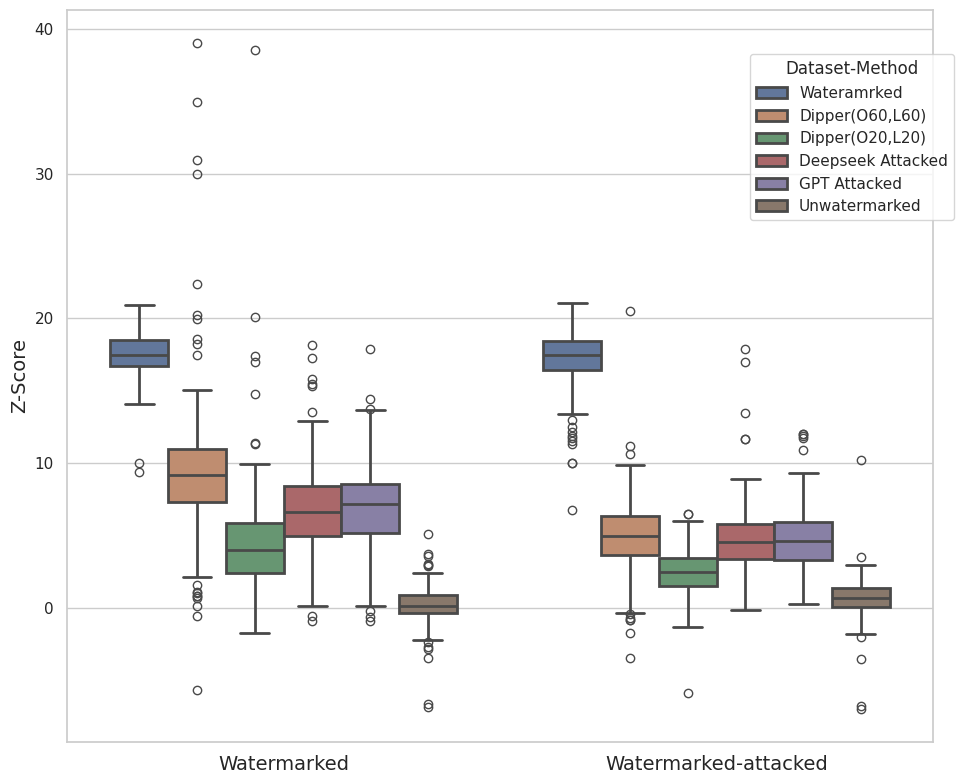

In [ ]:
################################################
# Dataset-Methord Visualization
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['WikiText-LSH', 'WikiText-SelfHash']
models = ["Wateramrked",
        "Dipper(O60,L60)",
        "Dipper(O20,L20)",
        "Deepseek Attacked",
        "GPT Attacked",
        "Unwatermarked"]

# WikiText_LSH="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# C4_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"

# WikiText_KGW="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score" 
# C4_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"

import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH_GPT": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "WikiText_LSH_dipper60": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O60_L60.jsonl_z_score",
    "WikiText_LSH_dipper20": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O20_L20.jsonl_z_score",
    "WikiText_LSH_deepseek": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_deepseek_attacker.jsonl_z_score",
    "WikiText_KGW_GPT": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score",
    "WikiText_KGW_dipper60": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O60_L60.jsonl_z_score",
    "WikiText_KGW_dipper20": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O20_L20.jsonl_z_score",
    "WikiText_KGW_deepseek": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_deepseek_attacker.jsonl_z_score",
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_z_score": [], "w_wm_output_attacked_z_score": [], "no_wm_output_z_score": []}

    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_z_score' in entry:
                    data["w_wm_output_z_score"].append(entry["w_wm_output_z_score"])
                if 'w_wm_output_attacked_z_score' in entry:
                    data["w_wm_output_attacked_z_score"].append(entry["w_wm_output_attacked_z_score"])
                if 'no_wm_output_z_score' in entry:
                    data["no_wm_output_z_score"].append(entry["no_wm_output_z_score"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "WikiText-LSH": {
        "Wateramrked": np.array(all_data["WikiText_LSH_GPT"]['w_wm_output_z_score']),
        "Dipper(O60,L60)": np.array(all_data["WikiText_LSH_dipper60"]['w_wm_output_attacked_z_score']),
        "Dipper(O20,L20)": np.array(all_data["WikiText_LSH_dipper20"]['w_wm_output_attacked_z_score']),
        "Deepseek Attacked": np.array(all_data["WikiText_LSH_deepseek"]['w_wm_output_attacked_z_score']),
        "GPT Attacked": np.array(all_data["WikiText_LSH_GPT"]['w_wm_output_attacked_z_score']),
        "Unwatermarked": np.array(all_data["WikiText_LSH_GPT"]['no_wm_output_z_score']),
    },
    "WikiText-SelfHash": {
        "Wateramrked": np.array(all_data["WikiText_KGW_GPT"]['w_wm_output_z_score']),
        "Dipper(O60,L60)": np.array(all_data["WikiText_KGW_dipper60"]['w_wm_output_attacked_z_score']),
        "Dipper(O20,L20)": np.array(all_data["WikiText_KGW_dipper20"]['w_wm_output_attacked_z_score']),
        "Deepseek Attacked": np.array(all_data["WikiText_KGW_deepseek"]['w_wm_output_attacked_z_score']),
        "GPT Attacked": np.array(all_data["WikiText_KGW_GPT"]['w_wm_output_attacked_z_score']),
        "Unwatermarked": np.array(all_data["WikiText_KGW_GPT"]['no_wm_output_z_score']),
    },
    # "Un-watermarked": {
    #     "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_z_score']),
    #     "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_z_score']),
    #     "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_z_score']),
    #     "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_z_score']),
    #     "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_z_score']),
    #     "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_z_score']),
    # }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8))

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('z-score ', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()

In [ ]:
################################################
# Dataset-Methord Visualization
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['WikiText-LSH', 'WikiText-SelfHash']
models = ["Wateramrked",
        "Dipper(O60,L60)",
        "Dipper(O20,L20)",
        "Deepseek Attacked",
        "GPT Attacked",
        "Unwatermarked"]

# WikiText_LSH="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# C4_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"

# WikiText_KGW="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score" 
# C4_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"

import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH_GPT": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "WikiText_LSH_dipper60": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O60_L60.jsonl_z_score",
    "WikiText_LSH_dipper20": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O20_L20.jsonl_z_score",
    "WikiText_LSH_deepseek": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_deepseek_attacker.jsonl_z_score",
    "WikiText_KGW_GPT": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score",
    "WikiText_KGW_dipper60": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O60_L60.jsonl_z_score",
    "WikiText_KGW_dipper20": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O20_L20.jsonl_z_score",
    "WikiText_KGW_deepseek": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_deepseek_attacker.jsonl_z_score",
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_z_score": [], "w_wm_output_attacked_z_score": [], "no_wm_output_z_score": []}

    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_z_score' in entry:
                    data["w_wm_output_z_score"].append(entry["w_wm_output_z_score"])
                if 'w_wm_output_attacked_z_score' in entry:
                    data["w_wm_output_attacked_z_score"].append(entry["w_wm_output_attacked_z_score"])
                if 'no_wm_output_z_score' in entry:
                    data["no_wm_output_z_score"].append(entry["no_wm_output_z_score"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "Wateramrked": {
        "Wateramrked": np.array(all_data["WikiText_LSH_GPT"]['w_wm_output_z_score']),
        "Dipper(O60,L60)": np.array(all_data["WikiText_LSH_dipper60"]['w_wm_output_attacked_z_score']),
        "Dipper(O20,L20)": np.array(all_data["WikiText_LSH_dipper20"]['w_wm_output_attacked_z_score']),
        "Deepseek Attacked": np.array(all_data["WikiText_LSH_deepseek"]['w_wm_output_attacked_z_score']),
        "GPT Attacked": np.array(all_data["WikiText_LSH_GPT"]['w_wm_output_attacked_z_score']),
        "Unwatermarked": np.array(all_data["WikiText_LSH_GPT"]['no_wm_output_z_score']),
    },
    "WikiText-SelfHash": {
        "Wateramrked": np.array(all_data["WikiText_KGW_GPT"]['w_wm_output_z_score']),
        "Dipper(O60,L60)": np.array(all_data["WikiText_KGW_dipper60"]['w_wm_output_attacked_z_score']),
        "Dipper(O20,L20)": np.array(all_data["WikiText_KGW_dipper20"]['w_wm_output_attacked_z_score']),
        "Deepseek Attacked": np.array(all_data["WikiText_KGW_deepseek"]['w_wm_output_attacked_z_score']),
        "GPT Attacked": np.array(all_data["WikiText_KGW_GPT"]['w_wm_output_attacked_z_score']),
        "Unwatermarked": np.array(all_data["WikiText_KGW_GPT"]['no_wm_output_z_score']),
    },
    # "Un-watermarked": {
    #     "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_z_score']),
    #     "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_z_score']),
    #     "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_z_score']),
    #     "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_z_score']),
    #     "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_z_score']),
    #     "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_z_score']),
    # }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8))

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('Z-Score', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()

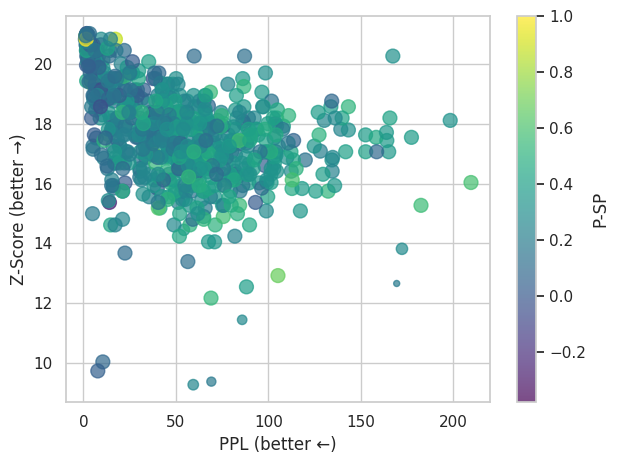

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import json

# 数据路径
path1 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score_ppl_psp'
# N = 500
# 初始化数据存储
ppl_data = []
z_score_data = []
length_data = []
psp = []
# 读取文件并解析数据
with open(path1, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data.append(entry["w_wm_output_ppl"])
            z_score_data.append(entry["w_wm_output_z_score"])
            length_data.append(entry['w_wm_output_length'])
            psp.append(entry['wm_and_no_wm_psp'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")
# ppl_data = ppl_data[:N]
# z_score_data = z_score_data[:N]
# length_data = length_data[:N]
# psp = psp[:N]

# 最小-最大归一化处理长度数据，以决定点的大小
length_min = np.min(length_data)
length_max = np.max(length_data)
normalized_length = (np.array(length_data) - length_min) / (length_max - length_min)  # 归一化到0到1之间
size = (normalized_length * 100)  # 调整大小，使其更适合散点图

# 绘制散点图
fig, ax = plt.subplots()
scatter = ax.scatter(ppl_data, z_score_data, s=size, c=psp, cmap='viridis', alpha=0.7)

# 添加标签和标题
ax.set_xlabel('PPL (better ←)', fontsize=12)
ax.set_ylabel('Z-Score (better →)', fontsize=12)
# ax.set_title('Scatter plot of PPL vs Z-Score with Length-based Marker Size', fontsize=16)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('P-SP', fontsize=12)

# 显示网格
ax.grid(True)

# 自动调整布局
fig.tight_layout()

# 显示图形
plt.show()


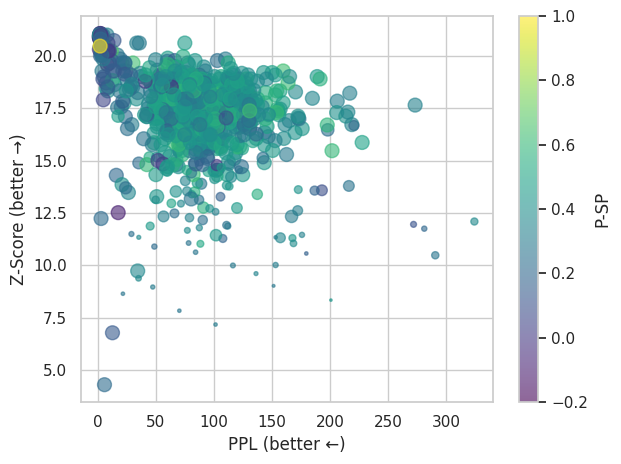

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import json

# 数据路径
path1 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score_ppl_psp'

# 初始化数据存储
ppl_data = []
z_score_data = []
length_data = []
psp = []
# 读取文件并解析数据
with open(path1, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data.append(entry["w_wm_output_ppl"])
            z_score_data.append(entry["w_wm_output_z_score"])
            length_data.append(entry['w_wm_output_length'])
            psp.append(entry['wm_and_no_wm_psp'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")
# ppl_data = ppl_data[:N]
# z_score_data = z_score_data[:N]
# length_data = length_data[:N]
# psp = psp[:N]


# 最小-最大归一化处理长度数据，以决定点的大小
length_min = np.min(length_data)
length_max = np.max(length_data)
normalized_length = (np.array(length_data) - length_min) / (length_max - length_min)  # 归一化到0到1之间
size = (normalized_length * 100)  # 调整大小，使其更适合散点图

# 绘制散点图
fig, ax = plt.subplots()
scatter = ax.scatter(ppl_data, z_score_data, s=size, c=psp, cmap='viridis', alpha=0.6)

# 添加标签和标题
ax.set_xlabel('PPL (better ←)', fontsize=12)
ax.set_ylabel('Z-Score (better →)', fontsize=12)
# ax.set_title('Scatter plot of PPL vs Z-Score with Length-based Marker Size', fontsize=16)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('P-SP', fontsize=12)

# 显示网格
ax.grid(True)

# 自动调整布局
fig.tight_layout()

# 显示图形
plt.show()

85.83934673366834 17.12248799941874


/tmp/ipykernel_3034335/1189622117.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


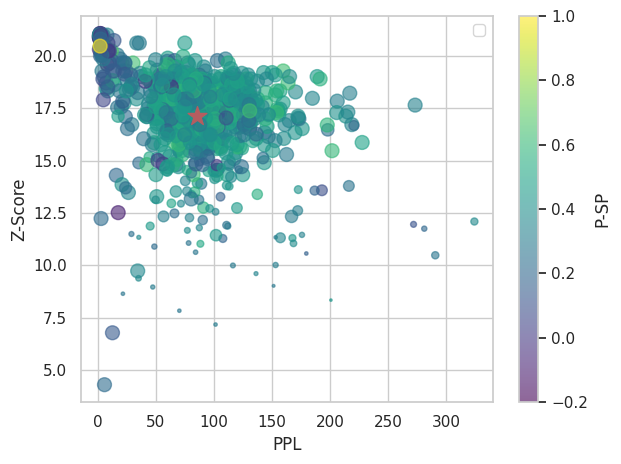

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import json

# 数据路径
path1 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score_ppl_psp'

# 初始化数据存储
ppl_data = []
z_score_data = []
length_data = []
psp = []

# 读取文件并解析数据
with open(path1, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data.append(entry["w_wm_output_ppl"])
            z_score_data.append(entry["w_wm_output_z_score"])
            length_data.append(entry['w_wm_output_length'])
            psp.append(entry['wm_and_no_wm_psp'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")
# ppl_data = ppl_data[:N]
# z_score_data = z_score_data[:N]
# length_data = length_data[:N]
# psp = psp[:N]

# 最小-最大归一化处理长度数据，以决定点的大小
length_min = np.min(length_data)
length_max = np.max(length_data)
normalized_length = (np.array(length_data) - length_min) / (length_max - length_min)  # 归一化到0到1之间
size = (normalized_length * 100)  # 调整大小，使其更适合散点图

# 计算重心 (均值坐标)
center_x = np.mean(ppl_data)
center_y = np.mean(z_score_data)
print(center_x,center_y)
# 绘制散点图
fig, ax = plt.subplots()
scatter = ax.scatter(ppl_data, z_score_data, c=psp, cmap='viridis', alpha=0.6, s=size)

# 添加重心标记
ax.scatter(center_x, center_y,color='#B55D60', marker='*', s=200)

# 添加标签和标题
ax.set_xlabel('PPL', fontsize=12)
ax.set_ylabel('Z-Score', fontsize=12)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('P-SP', fontsize=12)

# 显示网格
ax.grid(True)

# 显示重心图例
ax.legend()

# 自动调整布局
fig.tight_layout()

# 显示图形
plt.show()


52.749181034482746 17.639202582959804


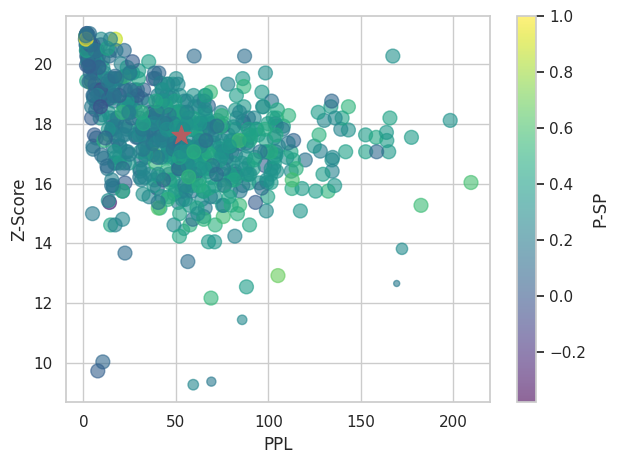

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import json

# 数据路径
path1 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score_ppl_psp'
# N = 500
# 初始化数据存储
ppl_data = []
z_score_data = []
length_data = []
psp = []
# 读取文件并解析数据
with open(path1, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data.append(entry["w_wm_output_ppl"])
            z_score_data.append(entry["w_wm_output_z_score"])
            length_data.append(entry['w_wm_output_length'])
            psp.append(entry['wm_and_no_wm_psp'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")
# ppl_data = ppl_data[:N]
# z_score_data = z_score_data[:N]
# length_data = length_data[:N]
# psp = psp[:N]

# 最小-最大归一化处理长度数据，以决定点的大小
length_min = np.min(length_data)
length_max = np.max(length_data)
normalized_length = (np.array(length_data) - length_min) / (length_max - length_min)  # 归一化到0到1之间
size = (normalized_length * 100)  # 调整大小，使其更适合散点图


# 计算重心 (均值坐标)
center_x = np.mean(ppl_data)
center_y = np.mean(z_score_data)

# 绘制散点图
fig, ax = plt.subplots()
scatter = ax.scatter(ppl_data, z_score_data, c=psp, cmap='viridis', alpha=0.6, s=size)

# 添加重心标记
ax.scatter(center_x, center_y,color='#B55D60', marker='*', s=200)
print(center_x,center_y)

# 添加标签和标题
ax.set_xlabel('PPL', fontsize=12)
ax.set_ylabel('Z-Score', fontsize=12)
# ax.set_title('Scatter plot of PPL vs Z-Score with Length-based Marker Size', fontsize=16)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('P-SP', fontsize=12)

# 显示网格
ax.grid(True)

# 自动调整布局
fig.tight_layout()

# 显示图形
plt.show()


500


/tmp/ipykernel_3034335/3157472269.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax.scatter(ppl_data_2, z_score_data_2,s=size_2, cmap='plasma', alpha=0.6, marker='^', label='Path 2')


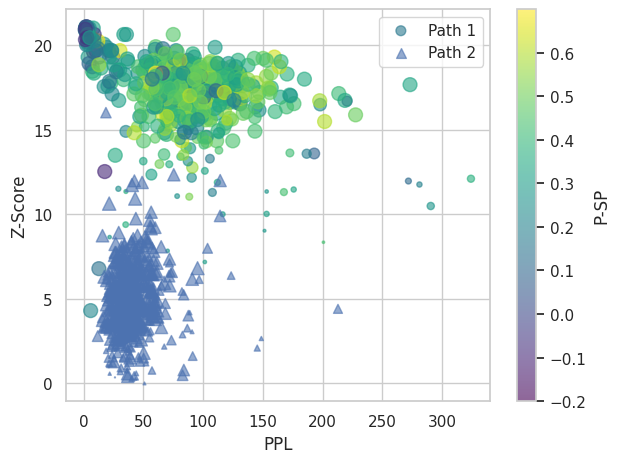

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import json
N=500
# 数据路径
path1 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score_ppl_psp'
path2 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score_ppl_psp'
# 初始化数据存储
ppl_data_1 = []
z_score_data_1 = []
length_data_1 = []
psp_1 = []

ppl_data_2 = []
z_score_data_2 = []
length_data_2 = []
psp_2 = []

# 读取第一个文件并解析数据
with open(path1, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data_1.append(entry["w_wm_output_ppl"])
            z_score_data_1.append(entry["w_wm_output_z_score"])
            length_data_1.append(entry['w_wm_output_length'])
            psp_1.append(entry['wm_and_no_wm_psp'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")

# 读取第二个文件并解析数据
with open(path2, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data_2.append(entry["w_wm_output_attacked_ppl"])
            z_score_data_2.append(entry["w_wm_output_attacked_z_score"])
            length_data_2.append(entry['w_wm_output_attacked_length'])
            
            # psp_2.append(entry['wm_and_no_wm_psp'])
        except (json.JSONDecodeError,KeyError) as e:
            pass

ppl_data_1 = ppl_data_1[:N]
z_score_data_1 = z_score_data_1[:N]
length_data_1 = length_data_1[:N]
psp_1 = psp_1[:N]

ppl_data_2 = ppl_data_2[:N]
z_score_data_2 = z_score_data_2[:N]
length_data_2 = length_data_2[:N]
psp2 = psp_1
psp_2 = psp_2[:N]
print(len(ppl_data_2))
# 最小-最大归一化处理长度数据，以决定点的大小
def normalize_length(length_data):
    length_min = np.min(length_data)
    length_max = np.max(length_data)
    return (np.array(length_data) - length_min) / (length_max - length_min)

normalized_length_1 = normalize_length(length_data_1)
normalized_length_2 = normalize_length(length_data_2)

size_1 = (normalized_length_1 * 100)  # 调整大小，使其更适合散点图
size_2 = (normalized_length_2 * 100)

# 绘制散点图
fig, ax = plt.subplots()

# 第一组数据（path1）
scatter1 = ax.scatter(ppl_data_1, z_score_data_1, s=size_1, c=psp_1, cmap='viridis', alpha=0.6, marker='o', label='Path 1')

# 第二组数据（path2），使用不同的散点形状
scatter2 = ax.scatter(ppl_data_2, z_score_data_2,s=size_2, cmap='plasma', alpha=0.6, marker='^', label='Path 2')

# 添加标签和标题
ax.set_xlabel('PPL', fontsize=12)
ax.set_ylabel('Z-Score', fontsize=12)
# ax.set_title('Scatter plot of PPL vs Z-Score for Two Paths', fontsize=16)

# 添加颜色条
cbar1 = plt.colorbar(scatter1)
cbar1.set_label('P-SP', fontsize=12)

# cbar2 = plt.colorbar(scatter2)
# cbar2.set_label('Normalized Length (Path 2)', fontsize=12)

# 显示网格
ax.grid(True)

# 添加图例
ax.legend()

# 自动调整布局
fig.tight_layout()

# 显示图形
plt.show()

500


/tmp/ipykernel_3034335/2747549413.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax.scatter(ppl_data_2, z_score_data_2,s=size_2, cmap='plasma', alpha=0.6, marker='^', label='Path 2')


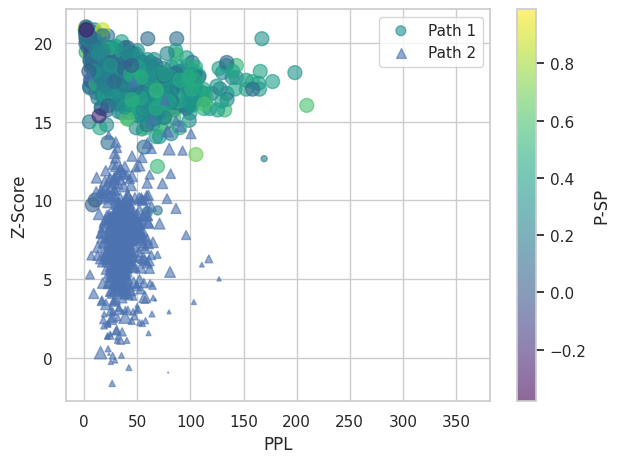

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
N=500
# 数据路径
path1 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score_ppl_psp'
path2 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score_ppl_psp'
# 初始化数据存储
ppl_data_1 = []
z_score_data_1 = []
length_data_1 = []
psp_1 = []

ppl_data_2 = []
z_score_data_2 = []
length_data_2 = []
psp_2 = []

# 读取第一个文件并解析数据
with open(path1, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data_1.append(entry["w_wm_output_ppl"])
            z_score_data_1.append(entry["w_wm_output_z_score"])
            length_data_1.append(entry['w_wm_output_length'])
            psp_1.append(entry['wm_and_no_wm_psp'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")

# 读取第二个文件并解析数据
with open(path2, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data_2.append(entry["w_wm_output_attacked_ppl"])
            z_score_data_2.append(entry["w_wm_output_attacked_z_score"])
            length_data_2.append(entry['w_wm_output_attacked_length'])
            
            # psp_2.append(entry['wm_and_no_wm_psp'])
        except (json.JSONDecodeError,KeyError) as e:
            pass

ppl_data_1 = ppl_data_1[:N]
z_score_data_1 = z_score_data_1[:N]
length_data_1 = length_data_1[:N]
psp_1 = psp_1[:N]

ppl_data_2 = ppl_data_2[:N]
z_score_data_2 = z_score_data_2[:N]
length_data_2 = length_data_2[:N]
psp2 = psp_1
psp_2 = psp_2[:N]
print(len(ppl_data_2))
# 最小-最大归一化处理长度数据，以决定点的大小
def normalize_length(length_data):
    length_min = np.min(length_data)
    length_max = np.max(length_data)
    return (np.array(length_data) - length_min) / (length_max - length_min)

normalized_length_1 = normalize_length(length_data_1)
normalized_length_2 = normalize_length(length_data_2)

size_1 = (normalized_length_1 * 100)  # 调整大小，使其更适合散点图
size_2 = (normalized_length_2 * 100)

# 绘制散点图
fig, ax = plt.subplots()

# 第一组数据（path1）
scatter1 = ax.scatter(ppl_data_1, z_score_data_1, s=size_1, c=psp_1, cmap='viridis', alpha=0.6, marker='o', label='Path 1')

# 第二组数据（path2），使用不同的散点形状
scatter2 = ax.scatter(ppl_data_2, z_score_data_2,s=size_2, cmap='plasma', alpha=0.6, marker='^', label='Path 2')

# 添加标签和标题
ax.set_xlabel('PPL', fontsize=12)
ax.set_ylabel('Z-Score', fontsize=12)
# ax.set_title('Scatter plot of PPL vs Z-Score for Two Paths', fontsize=16)

# 添加颜色条
cbar1 = plt.colorbar(scatter1)
cbar1.set_label('P-SP', fontsize=12)

# cbar2 = plt.colorbar(scatter2)
# cbar2.set_label('Normalized Length (Path 2)', fontsize=12)

# 显示网格
ax.grid(True)

# 添加图例
ax.legend()

# 自动调整布局
fig.tight_layout()

# 显示图形
plt.show()


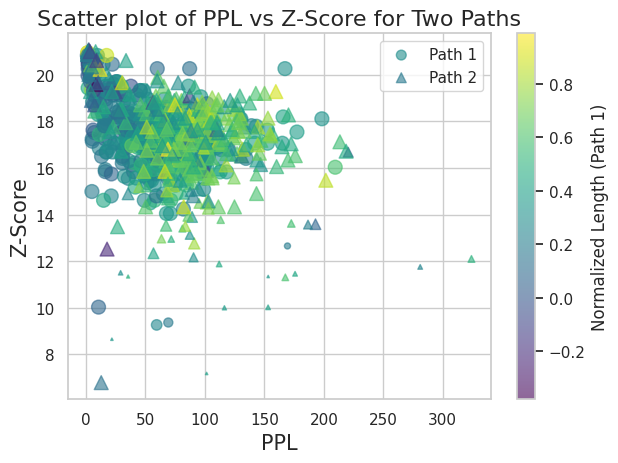

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import json
N=350

# 数据路径
path1 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score_ppl_psp'
path2 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score_ppl_psp'  # 替换为实际的第二个数据文件路径

# 初始化数据存储
ppl_data_1 = []
z_score_data_1 = []
length_data_1 = []
psp_1 = []

ppl_data_2 = []
z_score_data_2 = []
length_data_2 = []
psp_2 = []

# 读取第一个文件并解析数据
with open(path1, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data_1.append(entry["w_wm_output_ppl"])
            z_score_data_1.append(entry["w_wm_output_z_score"])
            length_data_1.append(entry['w_wm_output_length'])
            psp_1.append(entry['wm_and_no_wm_psp'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")

# 读取第二个文件并解析数据
with open(path2, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            ppl_data_2.append(entry["w_wm_output_ppl"])
            z_score_data_2.append(entry["w_wm_output_z_score"])
            length_data_2.append(entry['w_wm_output_length'])
            psp_2.append(entry['wm_and_no_wm_psp'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")
ppl_data_1 = ppl_data_1[:N]
z_score_data_1 = z_score_data_1[:N]
length_data_1 = length_data_1[:N]
psp_1 = psp_1[:N]

ppl_data_2 = ppl_data_2[:N]
z_score_data_2 = z_score_data_2[:N]
length_data_2 = length_data_2[:N]
psp2 = psp_1
psp_2 = psp_2[:N]

# 最小-最大归一化处理长度数据，以决定点的大小
def normalize_length(length_data):
    length_min = np.min(length_data)
    length_max = np.max(length_data)
    return (np.array(length_data) - length_min) / (length_max - length_min)

normalized_length_1 = normalize_length(length_data_1)
normalized_length_2 = normalize_length(length_data_2)

size_1 = (normalized_length_1 * 100)  # 调整大小，使其更适合散点图
size_2 = (normalized_length_2 * 100)

# 绘制散点图
fig, ax = plt.subplots()

# 第一组数据（path1）
scatter1 = ax.scatter(ppl_data_1, z_score_data_1, s=size_1, c=psp_1, cmap='viridis', alpha=0.6, marker='o', label='Path 1')

# 第二组数据（path2），使用不同的散点形状
scatter2 = ax.scatter(ppl_data_2, z_score_data_2, s=size_2, c=psp_2, cmap='viridis', alpha=0.6, marker='^', label='Path 2')

# 添加标签和标题
ax.set_xlabel('PPL', fontsize=15)
ax.set_ylabel('Z-Score', fontsize=15)
ax.set_title('Scatter plot of PPL vs Z-Score for Two Paths', fontsize=16)

# 添加颜色条
cbar1 = plt.colorbar(scatter1)
cbar1.set_label('Normalized Length (Path 1)', fontsize=12)

# cbar2 = plt.colorbar(scatter2)
# cbar2.set_label('Normalized Length (Path 2)', fontsize=12)

# 显示网格
ax.grid(True)

# 添加图例
ax.legend()

# 自动调整布局
fig.tight_layout()

# 显示图形
plt.show()


/tmp/ipykernel_3034335/2678287464.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grouped['std_z'].fillna(0, inplace=True)


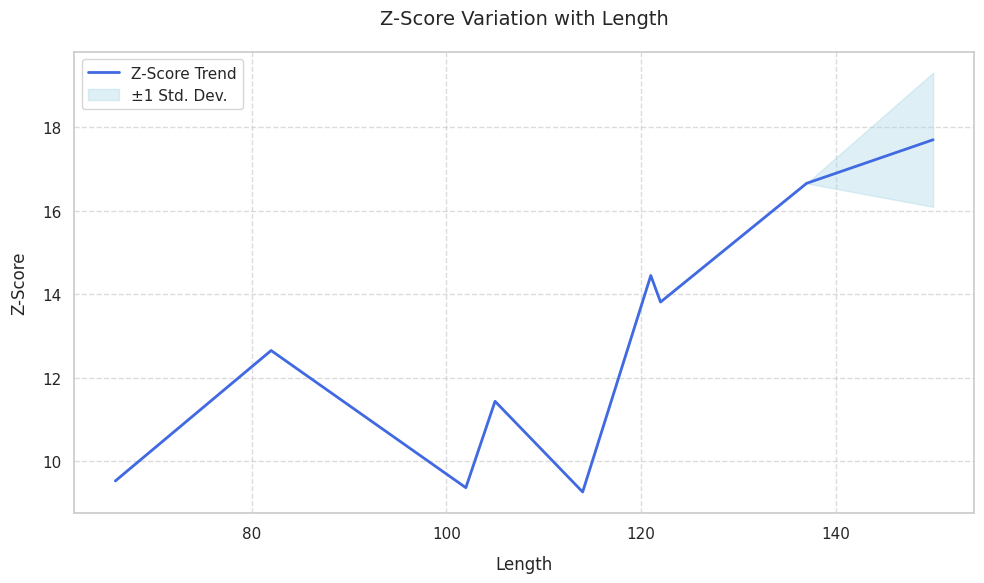

In [99]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

# Assuming you've already loaded the data as follows
# Initialize data storage
ppl_data_1 = []
z_score_data_1 = []
length_data_1 = []
psp_1 = []

# Path to the data file
path1 = '/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score_ppl_psp'  # Replace with the actual path to your file

# Read and parse the first file
with open(path1, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            entry = json.loads(line.strip())
            z_score_data_1.append(entry["w_wm_output_z_score"])
            length_data_1.append(entry['w_wm_output_length'])
        except json.JSONDecodeError as e:
            print(f"JSON解析失败: {e}, 跳过这一行")

# Convert data to numpy arrays for easy manipulation
length_data_1 = np.array(length_data_1)
z_score_data_1 = np.array(z_score_data_1)

data = pd.DataFrame({'length': length_data_1, 'z_score': z_score_data_1})

# 数据预处理：按length分组计算均值和标准差
# 使用pd.qcut自动分组（可根据需要改用pd.cut）
data_sorted = data.sort_values('length')
grouped = data_sorted.groupby('length', as_index=False).agg(
    mean_z=('z_score', 'mean'),
    std_z=('z_score', 'std')
)

# 处理可能存在的NaN值（当某个length组只有一个样本时）
grouped['std_z'].fillna(0, inplace=True)

# 可视化设置
plt.figure(figsize=(10, 6))
plt.plot(grouped['length'], 
         grouped['mean_z'], 
         label='Z-Score Trend', 
         color='royalblue',
         linewidth=2)

plt.fill_between(grouped['length'],
                 grouped['mean_z'] - grouped['std_z'],
                 grouped['mean_z'] + grouped['std_z'],
                 color='lightblue',
                 alpha=0.4,
                 label='±1 Std. Dev.')

# 图表装饰
plt.xlabel('Length', fontsize=12, labelpad=10)
plt.ylabel('Z-Score', fontsize=12, labelpad=10)
plt.title('Z-Score Variation with Length', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()

# 显示图表
plt.show()


/tmp/ipykernel_3034335/769362877.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grouped['std_z'].fillna(0, inplace=True)


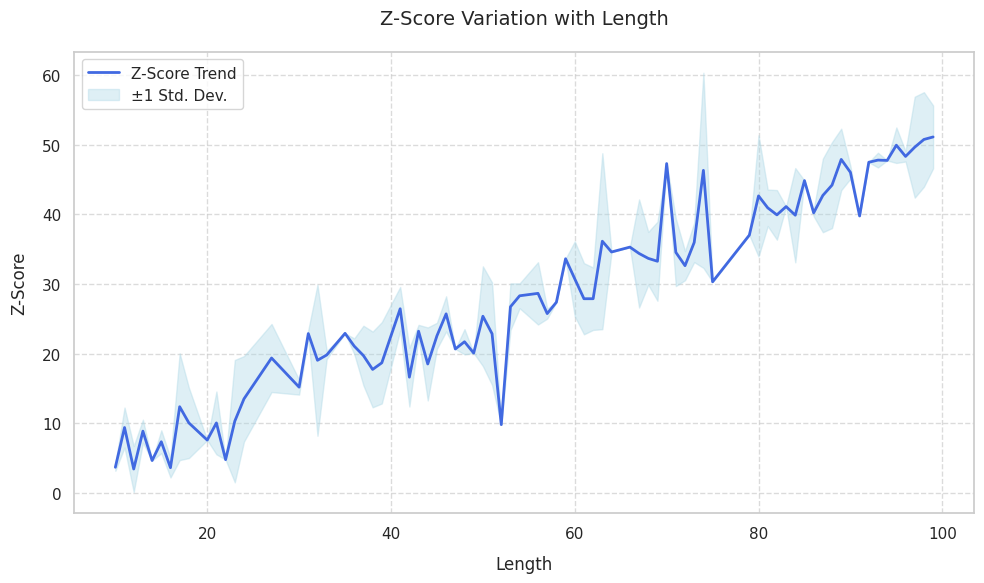

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 示例数据生成（替换为真实数据）
np.random.seed(42)
lengths = np.random.randint(10, 100, 200)
z_scores = 0.5 * lengths + np.random.normal(0, 5, 200)
data = pd.DataFrame({'length': lengths, 'z_score': z_scores})

# 数据预处理：按length分组计算均值和标准差
# 使用pd.qcut自动分组（可根据需要改用pd.cut）
data_sorted = data.sort_values('length')
grouped = data_sorted.groupby('length', as_index=False).agg(
    mean_z=('z_score', 'mean'),
    std_z=('z_score', 'std')
)

# 处理可能存在的NaN值（当某个length组只有一个样本时）
grouped['std_z'].fillna(0, inplace=True)

# 可视化设置
plt.figure(figsize=(10, 6))
plt.plot(grouped['length'], 
         grouped['mean_z'], 
         label='Z-Score Trend', 
         color='royalblue',
         linewidth=2)

plt.fill_between(grouped['length'],
                 grouped['mean_z'] - grouped['std_z'],
                 grouped['mean_z'] + grouped['std_z'],
                 color='lightblue',
                 alpha=0.4,
                 label='±1 Std. Dev.')

# 图表装饰
plt.xlabel('Length', fontsize=12, labelpad=10)
plt.ylabel('Z-Score', fontsize=12, labelpad=10)
plt.title('Z-Score Variation with Length', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()

# 显示图表
plt.show()